In [ ]:
from google.colab import drive
drive.mount('/drive')

#Optional: move to the desired location:
%cd /drive/My Drive/500

Mounted at /drive
/drive/My Drive/500


In [ ]:
from sklearn.preprocessing import LabelEncoder
# from sklearn.svm import LinearSVC
# from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import pandas as pd 
from imutils import paths
import numpy as np
import argparse
import imutils
import cv2
import os
import _pickle as cPickle
from sklearn.metrics import accuracy_score
from skimage.filters import threshold_otsu
import pickle
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt

from skimage import color, data, restoration

# from scipy.signal import convolve2d as conv2

from scipy.misc import face
from scipy.signal.signaltools import wiener
import matplotlib.pyplot as plt
import numpy as np

from scipy import ndimage
from scipy.stats import skew
from scipy.stats import kurtosis
import csv

In [ ]:
def get_denoising(image):
    

    resizing = cv2.resize(image, (224, 224)) 
    gray = cv2.cvtColor(resizing, cv2.COLOR_BGR2GRAY)


    gauss =gray.astype("float32")


    filtered_img = wiener(gauss, (3, 3))  #Filter the image
    filtered_img = np.uint8(filtered_img / filtered_img.max() * 255)


    kernel = np.ones((5, 5), np.uint8)
    blackhat = cv2.morphologyEx(filtered_img, cv2.MORPH_BLACKHAT, kernel)

    ret,th = cv2.threshold(blackhat,1,255,cv2.THRESH_BINARY)
    ret,thresh2 = cv2.threshold(th,0,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)


    img = cv2.inpaint(resizing,thresh2,1,cv2.INPAINT_TELEA)
    
    return img
    






In [ ]:
def hsv_image(img):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)
    features = [ 
                  np.mean(h), np.mean(s), np.mean(v),
                  np.std(h),np.std(s), np.std(v),
                  np.var(h), np.var(s),np.var(v),
                  skew(h, axis=None),skew(s, axis=None),skew(v, axis=None), 
                  kurtosis(h, None, fisher=False), kurtosis(s, None, fisher=False), kurtosis(v, None, fisher=False)]
    fitur={
        "mean_h" :features[0],
        "mean_s" :features[1],
        "mean_v" :features[2],

        "std_h":features[3],
        "std_s":features[4],
        "std_v":features[5],

        "var_h":features[6],
        "var_s":features[7],
        "var_v":features[8],

        "skew_h":features[9],
        "skew_s":features[10],
        "skew_v":features[11],

        "kurt_h":features[12],
        "kurt_s":features[13],
        "kurt_v":features[14]
    }
    print(fitur)
    return fitur


In [ ]:
imagePaths = list(paths.list_images('/drive/My Drive/Data_Baru10'))
# Early Detection and Classification of Melanoma menjelaskan tentang descriptors color

In [ ]:
data_hsv = []
labels = pd.DataFrame(columns=['label'])
# labels=[]

# image_fitur.append(fitur)


In [ ]:



for (i, imagePath) in enumerate(imagePaths):
    image = cv2.imread(imagePath)

    features_hsv = get_denoising(image)
    feat_hsv = hsv_image(features_hsv)
    
    


    data_hsv.append(feat_hsv)
    csv_columns = ['mean_h','mean_s', 'mean_v', 'std_h', 'std_s', 'std_v', 'var_h', 'var_s', 'var_v',
                    'skew_h','skew_s','skew_v','kurt_h','kurt_s','kurt_v'
                  ]
    csv_file ="/drive/My Drive/TA/hsv/fitur.csv"
    try:
        with open(csv_file, 'w') as csvfile:
            writer = csv.DictWriter(csvfile, fieldnames=csv_columns)
            writer.writeheader()
            for data in data_hsv:
                writer.writerow(data)
    except IOError:
        print("I/O error")
     

        
    label = imagePath.split(os.path.sep)[-2]

#     labels.append(label)

    labels.loc[len(labels)] = label





    if  i > 0 and i % 1 == 0:

        print("{}/{}".format(i, len(imagePaths)))
        
        


{'mean_h': 9.805624202806122, 'mean_s': 115.51112085459184, 'mean_v': 157.36174665178572, 'std_h': 4.701478419747665, 'std_s': 30.83696811313941, 'std_v': 38.45386373320251, 'var_h': 22.103899331353002, 'var_s': 950.9186024107768, 'var_v': 1478.6996360117075, 'skew_h': 20.194978034562503, 'skew_s': -0.34211891608853445, 'skew_v': -1.1118260927278345, 'kurt_h': 695.23768226103, 'kurt_s': 3.107546842890726, 'kurt_v': 3.064910565903033}
{'mean_h': 26.464265784438776, 'mean_s': 95.30363121811224, 'mean_v': 162.15848214285714, 'std_h': 52.15254197159523, 'std_s': 25.594689164134085, 'std_v': 65.83066802394818, 'var_h': 2719.8876340990014, 'var_s': 655.0881134086428, 'var_v': 4333.676852479273, 'skew_h': 2.497101336162965, 'skew_s': -0.07657113987118516, 'skew_v': -0.3437138335959606, 'kurt_h': 7.312542214935409, 'kurt_s': 3.217725414418193, 'kurt_v': 1.343220525353719}
1/225
{'mean_h': 9.151167889030612, 'mean_s': 94.5912786989796, 'mean_v': 166.25741390306123, 'std_h': 10.24528224044696, '

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

hsv_df = pd.read_csv("/drive/My Drive/TA/hsv/fitur.csv")

hsv_df.head()

mean_h      mean_s      mean_v  ...      kurt_h    kurt_s     kurt_v
0   9.805624  115.511121  157.361747  ...  695.237682  3.107547   3.064911
1  26.464266   95.303631  162.158482  ...    7.312542  3.217725   1.343221
2   9.151168   94.591279  166.257414  ...  221.373209  2.119396   3.011493
3   8.806720   95.621014  155.516861  ...  540.821130  4.042523   2.257890
4  10.995416   93.346201  180.660914  ...    2.037084  2.012010  39.392733

[5 rows x 15 columns]

In [ ]:
print(hsv_df)

        mean_h      mean_s      mean_v  ...      kurt_h    kurt_s     kurt_v
0     9.805624  115.511121  157.361747  ...  695.237682  3.107547   3.064911
1    26.464266   95.303631  162.158482  ...    7.312542  3.217725   1.343221
2     9.151168   94.591279  166.257414  ...  221.373209  2.119396   3.011493
3     8.806720   95.621014  155.516861  ...  540.821130  4.042523   2.257890
4    10.995416   93.346201  180.660914  ...    2.037084  2.012010  39.392733
..         ...         ...         ...  ...         ...       ...        ...
220  14.038624   22.443897  126.028001  ...  366.604780  3.089544   3.239203
221  14.020069   18.228715  164.253169  ...   73.753902  4.287474   2.882768
222  51.848394    5.271066  170.338110  ...    2.123435  5.502793   4.989500
223  15.661113   12.116590  138.721022  ...   24.542370  3.344549   2.655701
224  39.604791   13.631756  144.224868  ...    3.358861  3.196312   2.048223

[225 rows x 15 columns]


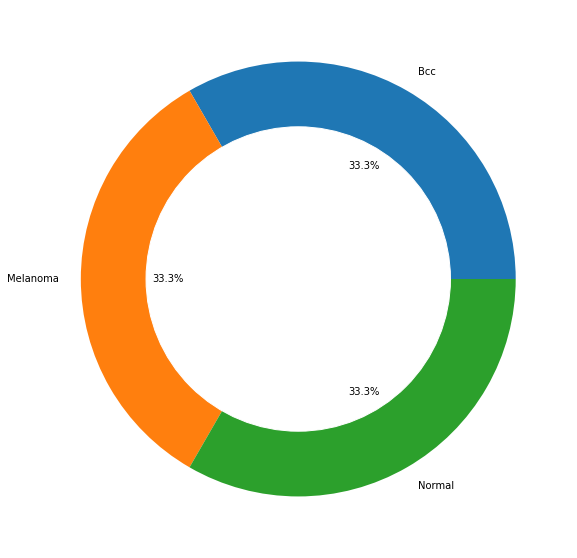

In [ ]:
label_distr = labels['label'].value_counts()

label_name = ['Bcc',  'Melanoma' , 'Normal']

plt.figure(figsize=(20,10))

my_circle = plt.Circle( (0,0), 0.7, color='white')
plt.pie(label_distr, 
        labels=label_name,  
        autopct='%1.1f%%')

p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [ ]:
print(label_distr)

Normal      75
Melanoma    75
Bcc         75
Name: label, dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


# ------------------------ Data Normalization menggunakan Decimal Scaling --------------------------------
def decimal_scaling(data):
    data = np.array(data, dtype=np.float32)
    max_row = data.max(axis=0)
    c = np.array([len(str(int(number))) for number in np.abs(max_row)])
    return data/(10**c)

# X = decimal_scaling(hsv_df.values)

X = decimal_scaling(
            hsv_df[['mean_h','mean_s', 'mean_v', 'std_h', 'std_s', 'std_v', 'var_h', 'var_s', 'var_v',
                    'skew_h','skew_s','skew_v','kurt_h','kurt_s','kurt_v']].values
                    )



In [ ]:
le = LabelEncoder()
le.fit_transform(labels["label"].values)


print(" categorical label : \n", le.classes_)

Y = le.transform(labels['label'].values)
Y = to_categorical(Y)


print("\n\n one hot encoding for sample 0 : \n", Y[0])


 categorical label : 
 ['Bcc' 'Melanoma' 'Normal']


 one hot encoding for sample 0 : 
 [0. 1. 0.]


In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(5, 5))
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [ ]:
 import numpy as np
 
 def display_summary(true,pred):
     cnf_matrix = confusion_matrix(true,pred)
     fp = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)
     fn = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
     tp = np.diag(cnf_matrix)
     tn = cnf_matrix.sum() - (fp + fn + tp)
 
     fp = fp.astype(float)
     fn = fn.astype(float)
     tp = tp.astype(float)
     tn = tn.astype(float)
 
     #tn, fp, fn, tp = confusion_matrix(true,pred).ravel()
     print('confusion matrix')
     print(np.array([[tp,fp],[fn,tn]]))
     print('sensitivity is %f',1.*tp/(tp+fn))
     print('specificity is %f',1.*tn/(tn+fp))
     print('accuracy is %f',1.*(tp+tn)/(tp+tn+fp+fn))
     print('balanced accuracy is %',1./2*(1.*tp/(tp+fn)+1.*tn/(tn+fp)))

# import numpy as np

# def display_summary(true,pred):
#     tn, fp, fn, tp = confusion_matrix(true,pred).ravel()
#     print('confusion matrix')
#     print(np.array([[tp,fp],[fn,tn]]))
#     print('sensitivity is %f',1.*tp/(tp+fn))
#     print('specificity is %f',1.*tn/(tn+fp))
#     print('accuracy is %f',1.*(tp+tn)/(tp+tn+fp+fn))
#     print('balanced accuracy is %',1./2*(1.*tp/(tp+fn)+1.*tn/(tn+fp)))
 
# print('Deep Neural Network')
# display_summary(y_test.argmax(axis=1), y_pred.argmax(axis=1))

iterate kfold :  0  +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
(180, 15) (45, 15)
Epoch 1/100
6/6 [==============================] - 1s 42ms/step - loss: 1.0952 - accuracy: 0.3722 - val_loss: 1.0850 - val_accuracy: 0.5556
Epoch 2/100
6/6 [==============================] - 0s 6ms/step - loss: 1.0731 - accuracy: 0.5778 - val_loss: 1.0658 - val_accuracy: 0.6222
Epoch 3/100
6/6 [==============================] - 0s 6ms/step - loss: 1.0419 - accuracy: 0.5944 - val_loss: 1.0241 - val_accuracy: 0.6000
Epoch 4/100
6/6 [==============================] - 0s 7ms/step - loss: 0.9942 - accuracy: 0.6389 - val_loss: 0.9659 - val_accuracy: 0.6222
Epoch 5/100
6/6 [==============================] - 0s 7ms/step - loss: 0.9290 - accuracy: 0.6278 - val_loss: 0.9036 - val_accuracy: 0.6444
Epoch 6/100
6/6 [==============================] - 0s 6ms/step - loss: 0.8654 - accuracy: 0.6389 - val_loss: 0.8271 - val_accuracy: 0.6667
Epoch 7/100
6/6 [=============================

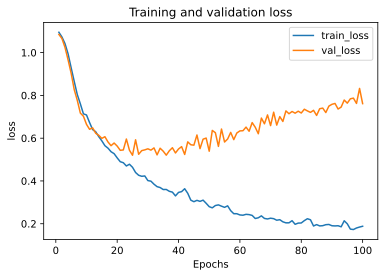

              precision    recall  f1-score   support

         Bcc       0.75      0.71      0.73        17
    Melanoma       0.80      0.89      0.84         9
      Normal       0.84      0.84      0.84        19

    accuracy                           0.80        45
   macro avg       0.80      0.81      0.80        45
weighted avg       0.80      0.80      0.80        45

Deep Neural Network
confusion matrix
[[[12.  8. 16.]
  [ 4.  2.  3.]]

 [[ 5.  1.  3.]
  [24. 34. 23.]]]
sensitivity is %f [0.71 0.89 0.84]
specificity is %f [0.86 0.94 0.88]
accuracy is %f [0.8  0.93 0.87]
balanced accuracy is % [0.78 0.92 0.86]


iterate kfold :  1  +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
(180, 15) (45, 15)
Epoch 1/100
6/6 [==============================] - 1s 34ms/step - loss: 1.0964 - accuracy: 0.3333 - val_loss: 1.0973 - val_accuracy: 0.2667
Epoch 2/100
6/6 [==============================] - 0s 6ms/step - loss: 1.0807 - accuracy: 0.5056 - val_loss: 1.

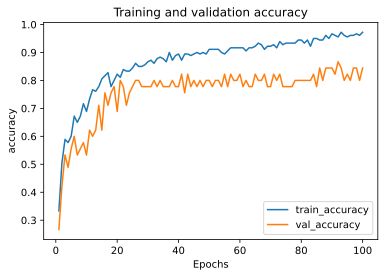

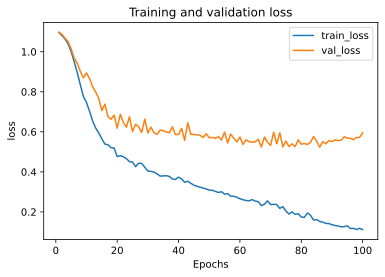

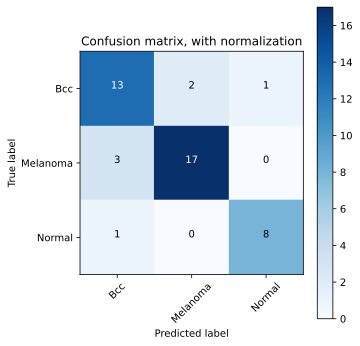

              precision    recall  f1-score   support

         Bcc       0.76      0.81      0.79        16
    Melanoma       0.89      0.85      0.87        20
      Normal       0.89      0.89      0.89         9

    accuracy                           0.84        45
   macro avg       0.85      0.85      0.85        45
weighted avg       0.85      0.84      0.85        45

Deep Neural Network
confusion matrix
[[[13. 17.  8.]
  [ 4.  2.  1.]]

 [[ 3.  3.  1.]
  [25. 23. 35.]]]
sensitivity is %f [0.81 0.85 0.89]
specificity is %f [0.86 0.92 0.97]
accuracy is %f [0.84 0.89 0.96]
balanced accuracy is % [0.84 0.89 0.93]


iterate kfold :  2  +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
(180, 15) (45, 15)
Epoch 1/100
6/6 [==============================] - 1s 32ms/step - loss: 1.0985 - accuracy: 0.3167 - val_loss: 1.0863 - val_accuracy: 0.5556
Epoch 2/100
6/6 [==============================] - 0s 8ms/step - loss: 1.0768 - accuracy: 0.5944 - val_loss: 1.

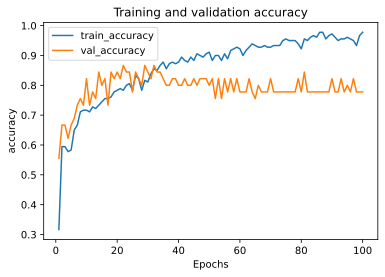

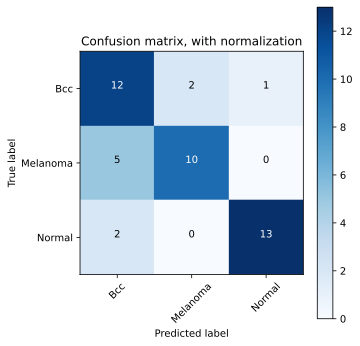

              precision    recall  f1-score   support

         Bcc       0.63      0.80      0.71        15
    Melanoma       0.83      0.67      0.74        15
      Normal       0.93      0.87      0.90        15

    accuracy                           0.78        45
   macro avg       0.80      0.78      0.78        45
weighted avg       0.80      0.78      0.78        45

Deep Neural Network
confusion matrix
[[[12. 10. 13.]
  [ 7.  2.  1.]]

 [[ 3.  5.  2.]
  [23. 28. 29.]]]
sensitivity is %f [0.8  0.67 0.87]
specificity is %f [0.77 0.93 0.97]
accuracy is %f [0.78 0.84 0.93]
balanced accuracy is % [0.78 0.8  0.92]


iterate kfold :  3  +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
(180, 15) (45, 15)
Epoch 1/100
6/6 [==============================] - 1s 36ms/step - loss: 1.0859 - accuracy: 0.4333 - val_loss: 1.0816 - val_accuracy: 0.4889
Epoch 2/100
6/6 [==============================] - 0s 7ms/step - loss: 1.0546 - accuracy: 0.5111 - val_loss: 1.

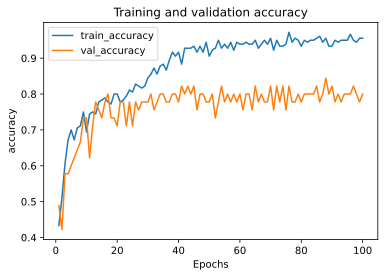

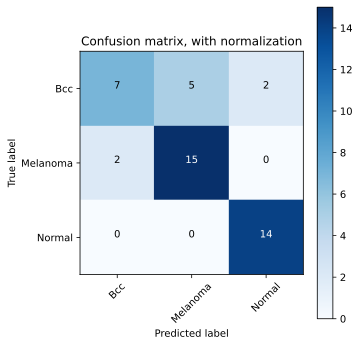

              precision    recall  f1-score   support

         Bcc       0.78      0.50      0.61        14
    Melanoma       0.75      0.88      0.81        17
      Normal       0.88      1.00      0.93        14

    accuracy                           0.80        45
   macro avg       0.80      0.79      0.78        45
weighted avg       0.80      0.80      0.79        45

Deep Neural Network
confusion matrix
[[[ 7. 15. 14.]
  [ 2.  5.  2.]]

 [[ 7.  2.  0.]
  [29. 23. 29.]]]
sensitivity is %f [0.5  0.88 1.  ]
specificity is %f [0.94 0.82 0.94]
accuracy is %f [0.8  0.84 0.96]
balanced accuracy is % [0.72 0.85 0.97]


iterate kfold :  4  +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
(180, 15) (45, 15)
Epoch 1/100
6/6 [==============================] - 1s 34ms/step - loss: 1.0931 - accuracy: 0.4778 - val_loss: 1.0908 - val_accuracy: 0.4000
Epoch 2/100
6/6 [==============================] - 0s 7ms/step - loss: 1.0775 - accuracy: 0.5056 - val_loss: 1.

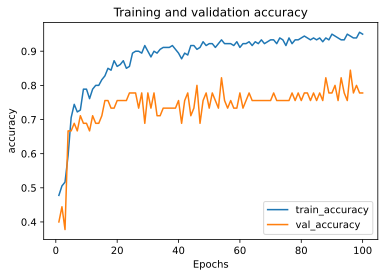

              precision    recall  f1-score   support

         Bcc       0.57      0.92      0.71        13
    Melanoma       0.90      0.64      0.75        14
      Normal       1.00      0.78      0.88        18

    accuracy                           0.78        45
   macro avg       0.82      0.78      0.78        45
weighted avg       0.85      0.78      0.79        45

Deep Neural Network
confusion matrix
[[[12.  9. 14.]
  [ 9.  1.  0.]]

 [[ 1.  5.  4.]
  [23. 30. 27.]]]
sensitivity is %f [0.92 0.64 0.78]
specificity is %f [0.72 0.97 1.  ]
accuracy is %f [0.78 0.87 0.91]
balanced accuracy is % [0.82 0.81 0.89]




Rata-Rata Akurasi
80.00% (+/- 2.43%)


In [ ]:
      from sklearn.model_selection import StratifiedKFold, KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.initializers import RandomNormal, Constant
from tensorflow import keras
from tensorflow.keras import regularizers
# Model with default batch normalization
from tensorflow.keras import layers

from tensorflow.keras.initializers import RandomNormal, Constant
from numpy.random import seed
from tensorflow import random
seed(0)
random.set_seed(0)

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cvscores = []
for i, (train_index, val_index) in enumerate (kfold.split(X, Y)):
# for i, (train_index, val_index) in enumerate(kfold.split(X, Y.argmax(1))):
  print('iterate kfold : ',i,' +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')

  x_train_kf, x_val_kf = X[train_index], X[val_index]
  y_train_kf, y_val_kf = Y[train_index], Y[val_index]

  print(x_train_kf.shape, x_val_kf.shape)

  model =keras.Sequential()
  model.add(Dense(15, input_dim=15, activation='relu'))

  model.add(Dense(128, activation='relu'))

  

  model.add(Dense(128, activation='relu'))

  model.add(Dense(128, activation='relu'))



  # model.add(Dropout(0.2))
  # model.add(Dense(128, activation='relu'))
  # model.add(Dropout(0.2))
  # model.add(Dense(128, activation='relu'))
  # model.add(Dropout(0.2))
  # model.add(Dense(128, activation='relu'))
  # model.add(Dropout(0.2))
  # model.add(Dense(128, activation='relu'))
  # model.add(Dropout(0.2))



  model.add(Dense(3,activation="softmax"))
  opt = keras.optimizers.Adam(learning_rate=0.001)
  model.compile(optimizer=opt, 
                  loss='categorical_crossentropy',
                  metrics = ['accuracy'])
 
#   history= model.fit(X[train_index], Y[train_index], epochs=100)
  history= model.fit(X[train_index], Y[train_index], epochs=100, 
                     validation_data=(X[val_index],Y[val_index]))
  
	# evaluate the model

  scores = model.evaluate(X[val_index], Y[val_index], verbose=0)

  print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
  print("\n")

  print('result ============================================================================================')
  plot_metric(history, 'accuracy')
  plot_metric(history, 'loss')

  # predict test data
  # y_pred=model.predict(X[val_index])
  # y_pred1=model.predict(X[train_index])

  y_pred=model.predict(x_val_kf)
  y_pred1=model.predict(x_train_kf)




  # Compute confusion matrix
  cnf_matrix = confusion_matrix(y_val_kf.argmax(axis=1), y_pred.argmax(axis=1))
  np.set_printoptions(precision=2)

  # Plot non-normalized confusion matrix
  plot_confusion_matrix(cnf_matrix, 
                      classes=['Bcc', 'Melanoma', 'Normal'],
                      normalize=False,
                      title='Confusion matrix, with normalization')

  print(classification_report(y_val_kf.argmax(axis=1), 
                            y_pred.argmax(axis=1), 
                            target_names=['Bcc',   'Melanoma', 'Normal']))
  print('Deep Neural Network')
  display_summary(y_val_kf.argmax(axis=1), y_pred.argmax(axis=1))
  print("\n")
  cvscores.append(scores[1] * 100)
print("\n")
print("Rata-Rata Akurasi")
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))




# save_model_path = "/drive/My Drive/Moddel/model_new2.h5"
# model.save(save_model_path,include_optimizer=False)

# save_model_path = "/drive/My Drive/Model/model_" + str(i) + ".h5"
# model.save(save_model_path,include_optimizer=False)